In [44]:
import sympy as smp

from sympy.physics.mechanics import *
from sympy.physics.quantum.trace import Tr
from sympy.physics.quantum import *
from sympy.physics.quantum.density import *
from sympy.physics.quantum import IdentityOperator

from sympy import Symbol, Integer
from sympy.physics.quantum import Dagger, qapply, represent, InnerProduct, Commutator
from sympy.physics.quantum.sho1d import RaisingOp, LoweringOp, NumberOp, Hamiltonian, SHOKet, SHOBra

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'nature'])

# Define quantities


In [45]:
N = smp.symbols('N', integer=True, positive=True)
Z = Symbol('Z', real=True, positive=True); Z
rho = Operator('rho'); rho
kN = SHOKet(N); kN
bN = SHOBra(N); bN
kNm1 = SHOKet(N-1); kNm1
bNm1 = SHOBra(N-1); bNm1
kNp1 = SHOKet(N+1); kNp1
bNp1 = SHOBra(N+1); bNp1
lambda_0 = Symbol('lambda_0', real=True, positive=True); lambda_0
lambda_1 = Symbol('lambda_1', real=True, positive=True); lambda_1
ad = RaisingOp('a')
a = LoweringOp('a')

In [46]:
def projector(N) :
    ket = SHOKet(N)
    bra = SHOBra(N)
    p = smp.exp( - lambda_0 * (N)) * ket * bra
    return p

projector(N-2)


exp(-lambda_0*(N - 2))*|N - 2>*<N - 2|

In [47]:
rho_val = smp.exp(lambda_1**2 / lambda_0) / Z * (projector(N-4) + projector(N-3) + projector(N-2) + projector(N-1) + projector(N) + projector(N+1) + projector(N+2) + projector(N+3)  + projector(N+4))
rho_val


exp(lambda_1**2/lambda_0)*(exp(-lambda_0*(N + 4))*|N + 4>*<N + 4| + exp(-lambda_0*(N + 3))*|N + 3>*<N + 3| + exp(-lambda_0*(N + 2))*|N + 2>*<N + 2| + exp(-lambda_0*(N + 1))*|N + 1>*<N + 1| + exp(-lambda_0*(N - 1))*|N - 1>*<N - 1| + exp(-lambda_0*(N - 2))*|N - 2>*<N - 2| + exp(-lambda_0*(N - 3))*|N - 3>*<N - 3| + exp(-lambda_0*(N - 4))*|N - 4>*<N - 4| + exp(-N*lambda_0)*|N>*<N|)/Z

test: first term in the expression of $\dot S$


In [48]:
left_val = smp.sqrt(N) * bNm1 - lambda_1 / lambda_0 * bN; left_val
right_val = smp.sqrt(N) * kNm1 - lambda_1 / lambda_0 * kN; right_val

left = bN * ad
right = a * kN

expr_1 = left * rho * right; display(expr_1) 
expr_1 = expr_1.subs(right, right_val); display(expr_1)
expr_1 = expr_1.subs(left, left_val); display(expr_1)

expr_1 = qapply(expr_1); expr_1 

<N|*RaisingOp(a)*rho*a*|N>

<N|*RaisingOp(a)*rho*(sqrt(N)*|N - 1> - lambda_1*|N>/lambda_0)

(sqrt(N)*<N - 1| - lambda_1*<N|/lambda_0)*rho*(sqrt(N)*|N - 1> - lambda_1*|N>/lambda_0)

-sqrt(N)*lambda_1*<N|*rho*|N - 1>/lambda_0 - sqrt(N)*lambda_1*<N - 1|*rho*|N>/lambda_0 + N*<N - 1|*rho*|N - 1> + lambda_1**2*<N|*rho*|N>/lambda_0**2

In [49]:
qapply(expr_1.subs(rho, rho_val).expand()).factor()

(N*lambda_0**2*exp(lambda_0) + lambda_1**2)*exp(-N*lambda_0)*exp(lambda_1**2/lambda_0)/(Z*lambda_0**2)

# Computation $\bra{N} {\mathcal{L}} \rho \ket{N}$


for $\ket{N}$ the eigen basis of operator $\hat b = \hat a + \frac{\lambda_1}{\lambda_0}$


In [50]:
beta = Symbol('beta', real=True, positive=True); beta

beta

In [51]:
gamma = 1; gamma
omega = 1; omega  
n_bar = smp.symbols(r'\bar{n}', integer=True, positive=True); n_bar
# n_bar = 1 / (smp.exp(beta * omega) - 1); n_bar
rho = Operator('rho'); rho

Dissipator_1 = gamma * (1 + n_bar) * (qapply(a * rho * Dagger(a) - 1/2 * AntiCommutator(qapply(Dagger(a) * a), rho))); Dissipator_1
Dissipator_2 = gamma * (n_bar) * (qapply(Dagger(a) * rho * a - 1/2 * AntiCommutator(qapply(a * Dagger(a)), rho))); Dissipator_2
Dissipator = Dissipator_1 + Dissipator_2; display(Dissipator)

# Hamiltonian
eps = Symbol('epsilon', real=True, positive=True); eps
H = qapply(-beta * Dagger(a) * a + eps * (a + Dagger(a))); H
liouvillian = -smp.I * Commutator(H, rho); display(liouvillian)
Dissipator = Dissipator + liouvillian; Dissipator

\bar{n}*(-0.5*{a*RaisingOp(a),rho} + RaisingOp(a)*rho*a) + (\bar{n} + 1)*(-0.5*{RaisingOp(a)*a,rho} + a*rho*RaisingOp(a))

-I*[-beta*RaisingOp(a)*a + epsilon*a + epsilon*RaisingOp(a),rho]

\bar{n}*(-0.5*{a*RaisingOp(a),rho} + RaisingOp(a)*rho*a) + (\bar{n} + 1)*(-0.5*{RaisingOp(a)*a,rho} + a*rho*RaisingOp(a)) - I*[-beta*RaisingOp(a)*a + epsilon*a + epsilon*RaisingOp(a),rho]

In [52]:
aN = a * kN; display(aN)
aN_val = smp.sqrt(N) * kNm1 - lambda_1 / lambda_0 * kN; display(aN_val)
display('-----------------')
Nad = Dagger(aN); display(Nad)
Nad_val = Dagger(aN_val); display(Nad_val)

a*|N>

sqrt(N)*|N - 1> - lambda_1*|N>/lambda_0

'-----------------'

<N|*RaisingOp(a)

sqrt(N)*<N - 1| - lambda_1*<N|/lambda_0

In [53]:
adN = ad * kN; display(adN)
adN_val = smp.sqrt(N+1) * kNp1 - lambda_1 / lambda_0 * kN; display(adN_val)
display('-----------------')
Na = Dagger(adN); display(Na)
Na_val = Dagger(adN_val); display(Na_val)

RaisingOp(a)*|N>

sqrt(N + 1)*|N + 1> - lambda_1*|N>/lambda_0

'-----------------'

<N|*a

sqrt(N + 1)*<N + 1| - lambda_1*<N|/lambda_0

In [54]:
expr_diss = (bN * Dissipator * kN); display(expr_diss)
expanded_dissipator = expr_diss.expand().doit().expand(); display(expanded_dissipator)

<N|*(\bar{n}*(-0.5*{a*RaisingOp(a),rho} + RaisingOp(a)*rho*a) + (\bar{n} + 1)*(-0.5*{RaisingOp(a)*a,rho} + a*rho*RaisingOp(a)) - I*[-beta*RaisingOp(a)*a + epsilon*a + epsilon*RaisingOp(a),rho])*|N>

\bar{n}*<N|*a*rho*RaisingOp(a)*|N> - 0.5*\bar{n}*<N|*a*RaisingOp(a)*rho*|N> - 0.5*\bar{n}*<N|*rho*a*RaisingOp(a)*|N> - 0.5*\bar{n}*<N|*rho*RaisingOp(a)*a*|N> - 0.5*\bar{n}*<N|*RaisingOp(a)*a*rho*|N> + \bar{n}*<N|*RaisingOp(a)*rho*a*|N> - I*beta*<N|*rho*RaisingOp(a)*a*|N> + I*beta*<N|*RaisingOp(a)*a*rho*|N> - I*epsilon*<N|*a*rho*|N> + I*epsilon*<N|*rho*a*|N> + I*epsilon*<N|*rho*RaisingOp(a)*|N> - I*epsilon*<N|*RaisingOp(a)*rho*|N> + <N|*a*rho*RaisingOp(a)*|N> - 0.5*<N|*rho*RaisingOp(a)*a*|N> - 0.5*<N|*RaisingOp(a)*a*rho*|N>

In [55]:
# expanded_dissipator.subs({aN: aN_val})
# expanded_dissipator.subs({adN: adN_val})
# expanded_dissipator.subs({Nad: Nad_val})
# expanded_dissipator.subs({Na: Na_val})
dissipator = expanded_dissipator.subs({
        aN: aN_val, 
        adN: adN_val, 
        Nad: Nad_val, 
        Na: Na_val
    }).expand().subs({
        aN: aN_val, 
        adN: adN_val, 
        Nad: Nad_val, 
        Na: Na_val
    }).expand(); display(dissipator)

-0.5*sqrt(N)*\bar{n}*<N|*rho*RaisingOp(a)*|N - 1> - 0.5*sqrt(N)*\bar{n}*<N - 1|*a*rho*|N> - 0.5*sqrt(N)*\bar{n}*lambda_1*<N|*rho*|N - 1>/lambda_0 - 0.5*sqrt(N)*\bar{n}*lambda_1*<N - 1|*rho*|N>/lambda_0 - I*sqrt(N)*beta*<N|*rho*RaisingOp(a)*|N - 1> + I*sqrt(N)*beta*<N - 1|*a*rho*|N> + I*sqrt(N)*epsilon*<N|*rho*|N - 1> - I*sqrt(N)*epsilon*<N - 1|*rho*|N> - 0.5*sqrt(N)*<N|*rho*RaisingOp(a)*|N - 1> - 0.5*sqrt(N)*<N - 1|*a*rho*|N> + N*\bar{n}*<N - 1|*rho*|N - 1> + N*\bar{n}*<N + 1|*rho*|N + 1> + N*<N + 1|*rho*|N + 1> - 0.5*\bar{n}*sqrt(N + 1)*<N|*rho*a*|N + 1> - 0.5*\bar{n}*sqrt(N + 1)*<N + 1|*RaisingOp(a)*rho*|N> + \bar{n}*<N + 1|*rho*|N + 1> - 0.5*\bar{n}*lambda_1*sqrt(N + 1)*<N|*rho*|N + 1>/lambda_0 - 0.5*\bar{n}*lambda_1*sqrt(N + 1)*<N + 1|*rho*|N>/lambda_0 + I*beta*lambda_1*sqrt(N + 1)*<N|*rho*|N + 1>/lambda_0 - I*beta*lambda_1*sqrt(N + 1)*<N + 1|*rho*|N>/lambda_0 + I*epsilon*sqrt(N + 1)*<N|*rho*|N + 1> - I*epsilon*sqrt(N + 1)*<N + 1|*rho*|N> + <N + 1|*rho*|N + 1> - 0.5*lambda_1*sqrt(N

In [56]:
Lrho = qapply(dissipator.subs(rho, rho_val).expand()).factor().simplify(); display(Lrho)
Lrho.expand().factor().collect(N)

1.0*(-N*exp(lambda_0) + N + 1)*(-\bar{n}*exp(lambda_0) + \bar{n} + 1)*exp((-N*lambda_0**2 - lambda_0**2 + lambda_1**2)/lambda_0)/Z

1.0*(N*(1.0*exp(lambda_0) - 1.0) - 1.0)*(1.0*\bar{n}*exp(lambda_0) - 1.0*\bar{n} - 1.0)*exp(-lambda_0)*exp(-N*lambda_0)*exp(lambda_1**2/lambda_0)/Z

# Compute $\dot S$


In [57]:
A = smp.symbols('A', real=True, positive=True); A
B = smp.symbols('B', real=True, positive=True); B

summand = -(A - lambda_0 * N) * (1 + N * B) * smp.exp(-N * lambda_0); summand


s = smp.Sum(summand, (N, 0, smp.oo)); display(s)
s.expand().doit()

Sum((-A + N*lambda_0)*(B*N + 1)*exp(-N*lambda_0), (N, 0, oo))

Sum(-A*exp(-N*lambda_0), (N, 0, oo)) + Sum(N*lambda_0*exp(-N*lambda_0), (N, 0, oo)) + Sum(-A*B*N*exp(-N*lambda_0), (N, 0, oo)) + Sum(B*N**2*lambda_0*exp(-N*lambda_0), (N, 0, oo))

In [58]:
x = smp.symbols('x', real=True, positive=True); x

f = 1 / (1 - smp.exp(-x)); display(f)
fp = f.diff(x); display(fp)
fpp = fp.diff(x); display(fpp)

1/(1 - exp(-x))

-exp(-x)/(1 - exp(-x))**2

exp(-x)/(1 - exp(-x))**2 + 2*exp(-2*x)/(1 - exp(-x))**3

In [59]:
S_dot = A * f - (A*B - lambda_0) * fp - lambda_0 * B * fpp; S_dot
S_dot = S_dot.subs({x:lambda_0}); S_dot

A/(1 - exp(-lambda_0)) - B*lambda_0*(exp(-lambda_0)/(1 - exp(-lambda_0))**2 + 2*exp(-2*lambda_0)/(1 - exp(-lambda_0))**3) + (A*B - lambda_0)*exp(-lambda_0)/(1 - exp(-lambda_0))**2

In [60]:
display(A)
A_val = 1 + lambda_1**2 / lambda_0 - smp.ln(Z); display(A_val)

A

-log(Z) + 1 + lambda_1**2/lambda_0

In [61]:
display(B)
B_val = 1 - smp.exp(-lambda_0); display(B_val)

B

1 - exp(-lambda_0)

In [62]:
# prefactor
C = smp.Symbol('C', real=True, positive=True); display(C)
C_val = -smp.exp(-lambda_0 + lambda_1**2 / lambda_0) / Z * (1 + n_bar * (1 - smp.exp(lambda_0))); C_val

C

-(\bar{n}*(1 - exp(lambda_0)) + 1)*exp(-lambda_0 + lambda_1**2/lambda_0)/Z

In [63]:
display(S_dot)
S_dot = S_dot.subs({A:A_val, B:B_val, C:C_val}).simplify(); S_dot

A/(1 - exp(-lambda_0)) - B*lambda_0*(exp(-lambda_0)/(1 - exp(-lambda_0))**2 + 2*exp(-2*lambda_0)/(1 - exp(-lambda_0))**3) + (A*B - lambda_0)*exp(-lambda_0)/(1 - exp(-lambda_0))**2

(-lambda_0**2*(exp(lambda_0) + 1) - lambda_0**2*exp(lambda_0) - (1 - exp(lambda_0))*(lambda_0*(1 - log(Z)) + lambda_1**2)*exp(lambda_0) - (1 - exp(lambda_0))*(lambda_0*(1 - log(Z)) + lambda_1**2))/(lambda_0*(1 - exp(lambda_0))**2)

In [64]:
expr = S_dot.factor(); expr

-(2*lambda_0**2*exp(lambda_0) + lambda_0**2 + lambda_0*exp(2*lambda_0)*log(Z) - lambda_0*exp(2*lambda_0) - lambda_0*log(Z) + lambda_0 - lambda_1**2*exp(2*lambda_0) + lambda_1**2)/(lambda_0*(exp(lambda_0) - 1)**2)

In [65]:
den = - lambda_0 * (smp.exp(lambda_0) -1)**2; display(den)
num = expr * den; num

-lambda_0*(exp(lambda_0) - 1)**2

2*lambda_0**2*exp(lambda_0) + lambda_0**2 + lambda_0*exp(2*lambda_0)*log(Z) - lambda_0*exp(2*lambda_0) - lambda_0*log(Z) + lambda_0 - lambda_1**2*exp(2*lambda_0) + lambda_1**2

In [66]:
clean_numerator = num.collect(lambda_0); clean_numerator

lambda_0**2*(2*exp(lambda_0) + 1) + lambda_0*(exp(2*lambda_0)*log(Z) - exp(2*lambda_0) - log(Z) + 1) - lambda_1**2*exp(2*lambda_0) + lambda_1**2

In [67]:
Z_val = smp.exp(lambda_1**2 / lambda_0) / (1 - smp.exp(-lambda_0)); Z_val

clean_numerator = clean_numerator.subs({Z:Z_val}); display(clean_numerator)
final_num = clean_numerator.simplify(); final_num

lambda_0**2*(2*exp(lambda_0) + 1) + lambda_0*(exp(2*lambda_0)*log(exp(lambda_1**2/lambda_0)/(1 - exp(-lambda_0))) - exp(2*lambda_0) - log(exp(lambda_1**2/lambda_0)/(1 - exp(-lambda_0))) + 1) - lambda_1**2*exp(2*lambda_0) + lambda_1**2

lambda_0*(lambda_0*exp(2*lambda_0) + 2*lambda_0*exp(lambda_0) + exp(2*lambda_0)*log(1/(exp(lambda_0) - 1)) - exp(2*lambda_0) - log(1/(exp(lambda_0) - 1)) + 1)

In [68]:
final_expr = C_val * final_num / den; final_expr
final_expr = final_expr.subs({Z:Z_val}).simplify(); final_expr

(-\bar{n}*(1 - exp(lambda_0)) - 1)*(lambda_0*exp(2*lambda_0) + 2*lambda_0*exp(lambda_0) + exp(2*lambda_0)*log(1/(exp(lambda_0) - 1)) - exp(2*lambda_0) - log(1/(exp(lambda_0) - 1)) + 1)*exp(-2*lambda_0)/(1 - exp(lambda_0))

In [69]:
n_bar_val = 1 / (smp.exp(beta * omega) - 1); n_bar_val
final_expr_subs = final_expr.subs({n_bar:n_bar_val}).simplify(); final_expr_subs

(exp(beta) - exp(lambda_0))*(lambda_0*exp(2*lambda_0) + 2*lambda_0*exp(lambda_0) + exp(2*lambda_0)*log(1/(exp(lambda_0) - 1)) - exp(2*lambda_0) - log(1/(exp(lambda_0) - 1)) + 1)*exp(-2*lambda_0)/((1 - exp(beta))*(1 - exp(lambda_0)))

In [70]:
final = final_expr_subs.simplify(); final.simplify()

(exp(beta) - exp(lambda_0))*(lambda_0*exp(2*lambda_0) + 2*lambda_0*exp(lambda_0) + exp(2*lambda_0)*log(1/(exp(lambda_0) - 1)) - exp(2*lambda_0) - log(1/(exp(lambda_0) - 1)) + 1)*exp(-2*lambda_0)/((1 - exp(beta))*(1 - exp(lambda_0)))

In [80]:
S1 = smp.Symbol('S1', real=True, positive=True); S1
S2 = smp.Symbol('S2', real=True, positive=True); S2
S3 = smp.Symbol('S3', real=True, positive=True); S3

manual_expr = (1-smp.exp(-lambda_0))**2 * (-lambda_0 * (n_bar * (1 - smp.exp(lambda_0))+ 1) * S1 + S2 * smp.log(1 - smp.exp(-lambda_0)) * (n_bar + 1 / (1 - smp.exp(lambda_0))) + (-lambda_0 * (n_bar + 1 / (1 - smp.exp(lambda_0))) + smp.log(1 - smp.exp(-lambda_0)) * (n_bar * (1 - smp.exp(lambda_0))+ 1)) * S3)

manual_expr

(1 - exp(-lambda_0))**2*(-S1*lambda_0*(\bar{n}*(1 - exp(lambda_0)) + 1) + S2*(\bar{n} + 1/(1 - exp(lambda_0)))*log(1 - exp(-lambda_0)) + S3*(-lambda_0*(\bar{n} + 1/(1 - exp(lambda_0))) + (\bar{n}*(1 - exp(lambda_0)) + 1)*log(1 - exp(-lambda_0))))

In [81]:
x = smp.symbols('x', real=True, positive=True); x

f = 1 / (1 - smp.exp(-x)); display(f)
fp = f.diff(x); display(fp)
fpp = fp.diff(x); display(fpp)

1/(1 - exp(-x))

-exp(-x)/(1 - exp(-x))**2

exp(-x)/(1 - exp(-x))**2 + 2*exp(-2*x)/(1 - exp(-x))**3

In [85]:
simplified_manual_expr = manual_expr.subs({S1:fpp, S2:f, S3:-fp}).subs({x:lambda_0}).simplify(); simplified_manual_expr

-lambda_0*(-\bar{n}*exp(lambda_0) + \bar{n} + 1)/(exp(lambda_0) - 1)

In [97]:
new_S_dot = simplified_manual_expr.subs({n_bar:n_bar_val}).simplify(); new_S_dot

-lambda_0*(exp(beta) - exp(lambda_0))/((exp(beta) - 1)*(exp(lambda_0) - 1))

check that the Hamiltonian does not contributes


In [29]:
rho_val

exp(lambda_1**2/lambda_0)*(exp(-lambda_0*(N + 4))*|N + 4>*<N + 4| + exp(-lambda_0*(N + 3))*|N + 3>*<N + 3| + exp(-lambda_0*(N + 2))*|N + 2>*<N + 2| + exp(-lambda_0*(N + 1))*|N + 1>*<N + 1| + exp(-lambda_0*(N - 1))*|N - 1>*<N - 1| + exp(-lambda_0*(N - 2))*|N - 2>*<N - 2| + exp(-lambda_0*(N - 3))*|N - 3>*<N - 3| + exp(-lambda_0*(N - 4))*|N - 4>*<N - 4| + exp(-N*lambda_0)*|N>*<N|)/Z

In [30]:
Comm = Commutator(H, rho); display(Comm)
Comm = Comm.expand(commutator=True).doit(); display(Comm)
proj_comm = qapply(bN * Comm * kN); display(proj_comm)
proj_comm = proj_comm.subs({rho: rho_val}); display(qapply(proj_comm))

[-beta*RaisingOp(a)*a + epsilon*a + epsilon*RaisingOp(a),rho]

-beta*(-rho*RaisingOp(a)*a + RaisingOp(a)*a*rho) + epsilon*(a*rho - rho*a) - epsilon*(rho*RaisingOp(a) - RaisingOp(a)*rho)

-sqrt(N)*epsilon*<N|*rho*|N - 1> + N*beta*<N|*rho*|N> - beta*<N|*RaisingOp(a)*a*rho*|N> - epsilon*sqrt(N + 1)*<N|*rho*|N + 1> + epsilon*<N|*a*rho*|N> + epsilon*<N|*RaisingOp(a)*rho*|N>

0

# plot $\dot S$ as a function of the Lagrange multipliers (the second expression is the correct one)


2D plot


In [98]:
Sdot_fun = smp.lambdify([lambda_0, lambda_1, beta], final)
Sdot_fun_2 = smp.lambdify([lambda_0, lambda_1, beta], new_S_dot)

In [99]:
beta_true = 3

xmin = 0.3
xmax = 7

X = np.linspace(xmin, xmax, 50)
Y = np.linspace(xmin, xmax, 50)
X, Y = np.meshgrid(X, Y)

fxy = Sdot_fun(X, Y, beta_true)

In [100]:
fxy.shape

(50, 50)

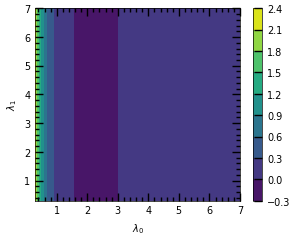

In [101]:
plt.contourf(X, Y, fxy)  
plt.xlabel(r'$\lambda_0$')
plt.ylabel(r'$\lambda_1$')
plt.colorbar()

1D plot


In [102]:
Sdot_fun = smp.lambdify([lambda_0, beta], final)
Sdot_fun_2 = smp.lambdify([lambda_0, beta], new_S_dot)

In [103]:
Sdot_fun(np.array([2, 3]), 2)
Sdot_fun_2(np.array([2, 3]), 2)

array([-0.        ,  0.31236584])

In [104]:
beta_true = 0.8

xmin = 0.1
xmax = 0.6

X = np.array([0.1, 0.2, 3, 4])

Sdot_fun(X, beta_true)
Sdot_fun_2(X, beta_true)

array([-0.86923657, -0.74013787,  2.29071157,  3.18923544])

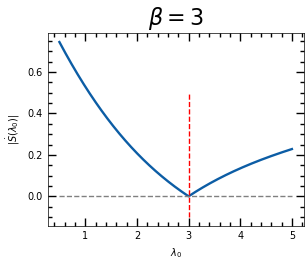

In [127]:
beta_true = 3

xmin = 0.5
xmax = 5

X = np.linspace(xmin, xmax, 2000)
# Y = np.abs(Sdot_fun(X, beta_true))
Y = np.abs(Sdot_fun_2(X, beta_true))

plt.plot(X, Y, lw=1.7)  
plt.xlabel(r'$\lambda_0$')
plt.ylabel(r'$|\dot{S}(\lambda_0)|$')
plt.title(rf'$\beta = {beta_true}$')
plt.vlines(beta_true, -0.1, 0.5, colors='r', linestyles='dashed')
plt.hlines(0, xmin, xmax, linestyles='dashed', color='gray')
plt.savefig(f'../figs/th_abs_Sdot_lambda0_beta_{beta_true}.pdf')
# plt.xscale('log')
# plt.yscale('log')

In [106]:
from_val = 0
X[np.argmin(Y[X>from_val]) + len(X[X<from_val])]


3.0010005002501248

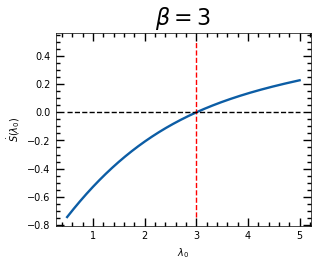

In [126]:
beta_true = 3

xmin = 0.5
xmax = 5

X = np.linspace(xmin, xmax, 2000)
# Y = Sdot_fun(X, beta_true)
Y = Sdot_fun_2(X, beta_true)

plt.plot(X, Y, lw=1.7)  
plt.xlabel(r'$\lambda_0$')
plt.ylabel(r'$\dot{S}(\lambda_0)$')
plt.vlines(beta_true, min(Y), 0.5, colors='r', linestyles='dashed')
plt.title(rf'$\beta = {beta_true}$')
# plt.ylim([None, 0.1])
plt.hlines(0, xmin, xmax, linestyles='dashed', color='black')
plt.savefig(f'../figs/th_Sdot_lambda0_beta_{beta_true}.pdf')

np.savetxt(f'th_Sdot_lambda0_beta_{beta_true}.dat', np.array([X, Y]).T)


In [41]:
X[np.argmin(Y)]

2.039769884942471

In [43]:
np.min(Y)

-0.027289948255880454